# Dự đoán giá nhà với Multivariate Linear Regression

In [25]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
np.set_printoptions(precision=3, suppress=True)

## 1. Load dữ liệu

In [3]:
npzfile = np.load("data/boston_housing.npz")
#print(npzfile.files)
X = npzfile["x"]
Y = npzfile["y"]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [16]:
print(X[0])
print(Y[0])
print(np.min(Y), np.max(Y), np.mean(Y))

[  0.006  18.      2.31    0.      0.538   6.575  65.2     4.09    1.
 296.     15.3   396.9     4.98 ]
24.0
5.0 50.0 22.532806324110677


**y = a1x1 + a2x2 + a3x3 + ... + a13x13 + b**

## 2. Chia dữ liệu ra thành 2 tập train và test

**(1) Tạo các indices ngẫu nhiên**

In [26]:
np.random.seed(3)
rand_indices = np.arange(Y.size)
np.random.shuffle(rand_indices)

print(rand_indices.size)
#rand_indices

506


**(2) Chia các indices ra làm 2 phần**

In [27]:
# Thường chia 8/2
N_TRAIN = 400
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]
print(test_indices)

[104 312 437 498  91 182 315 459 172 232 473  36 156   2 242 308 289  48
 414 141 223 352 183 331 446 487 160 336 400 219  99 380 235 450 117 341
   1 113 462 174 253 444 501 184 165 372 274 192   0  54 375  28 206 383
 492  49 350  20 293 176 335 379  33 171   7 318 504 106 413  97 110 360
  69 346 435 129 316 447 258 322 150 474 337  26 398 423  93 428 148 480
 422 119 405 138 169 363 202 147 277 256 456 440 131 249 152 362]


**(3) Dựa vào 2 tập index để lấy ra 2 tập dữ liệu**

In [6]:
N_TRAIN = 400
train_indices = rand_indices[0:N_TRAIN]
test_indices = rand_indices[N_TRAIN:]

x_train, y_train = X[train_indices], Y[train_indices]
print(x_train.shape, y_train.shape)

x_test, y_test = X[test_indices], Y[test_indices]
print(x_test.shape, y_test.shape)

(400, 13) (400,)
(106, 13) (106,)


## 3. Tạo mô hình Linear Regression
Sử dụng lớp `LinearRegression` của thư viện `sklearn`

**(1) Khởi tạo và huấn luyện (fit) mô hình**

In [28]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

print(model.coef_)
print(model.intercept_)

[ -0.062   0.044   0.037   2.609 -18.593   3.566   0.006  -1.6     0.323
  -0.014  -1.001   0.011  -0.593]
40.135900798429155


In [8]:
# Dự đoán
np.sum(model.coef_*x_train[0]) + model.intercept_

38.72927252397488

In [9]:
# Thực tế
y_train[0]

44.8

In [10]:
# Dự đoán
gia_nha = model.predict([x_train[0]]).squeeze()
print(gia_nha)

38.72927252397487


**(2) Thử đánh giá lại trên tập train**

In [11]:
r2 = model.score(x_train, y_train)
print(r2)

0.7452121887690026


**(3) Đánh giá trên tập test**

In [12]:
q2 = model.score(x_test, y_test)
print(q2)

0.6975631301834087


## 4. Sử dụng mô hình

In [29]:
y_hat = model.predict(x_test)
print(y_hat.shape)
err = y_hat - y_test
print(np.mean(abs(err)))
print(np.mean(abs(err))/np.mean(Y)) # Mong đợi Tỷ lệ lỗi 5%

(106,)
3.368669495325123
0.14950066347131208


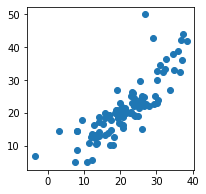

In [18]:
# Scatter plot
plt.figure(figsize=[3,3]) 
plt.scatter(y_hat, y_test)
plt.show()

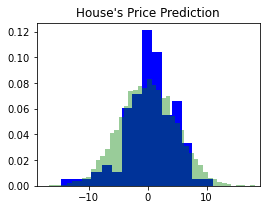

In [41]:
def plot_error(err, bins=10):
    mean, std = np.mean(err), np.std(err)
    
    plt.figure(figsize=[4,3])    
    plt.title("House's Price Prediction")
    plt.xlim([mean - 4*std,mean + 4*std]); #plt.ylim([0,60])
    plt.hist(err, density=True, bins=bins, color='b')
    
    #x = np.linspace(mean - 4*std, mean + 4*std,100)
    #plt.plot(x, stats.norm.pdf(x, mean, std))
    
    norm_dist = np.random.normal(mean, std, 10000)
    plt.hist(norm_dist, color='g', alpha=0.4, density=True, bins=50)
    
    
    plt.show()
plot_error(err, bins=20)

**Cách tính R2 bằng hàm `r2_score` trong sklearn**

In [33]:
from sklearn.metrics import r2_score
r2_score(y_test, y_hat)

0.6975631301834087

## 5. Đánh giá mô hình với Khoảng tin cậy

In [42]:
# Confidence Interval of 95%
np.percentile(err, [2.5, 97.5])

array([-10.945,   7.032])